# Self-Drive Cars' Sentiment Analysis

- Feature extraction 
- Text cleaning
- Comparison of undity and cleaned text data



# 1)-Importing key modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import datetime as dt
import numpy as np
import requests
import pickle

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hassansherwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import spacy 

nlp = spacy.load("en_core_web_sm") # preload model

In [4]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2)-Loading data

In [5]:
filename='train.csv'

In [6]:
train=pd.read_csv(filename)
train.shape

(15000, 1)

In [7]:
train.head(2)

,TEXT
0,Unless you’re trying to buy me a Mercedes G-wa...
1,Ford recently made news by suspending producti...


# 3)-Feature Extraction

- Number of words
- Number of characters
- Average word length
- Number of stopwords
- Number of special characters
- Number of numerics
- Number of uppercase words

### 3.1)-Number of words

One of the most basic features we can extract is the number of words in each tweet. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

To do this, we simply use the split function

In [8]:
train['word_count'] = train['TEXT'].apply(lambda x: len(str(x).split(" ")))
train[['TEXT','word_count']].head()

,TEXT,word_count
0,Unless you’re trying to buy me a Mercedes G-wa...,15
1,Ford recently made news by suspending producti...,27
2,Just to get a closer look at the interior of o...,22
3,"In October 2014, General Motors got permission...",17
4,I took a spin in a self-driving car today. My ...,32


### 3.2)-Number of characters
This feature is also based on the previous feature intuition. Here, we calculate the number of characters in each tweet(space, special character included). This is done by calculating the length of the tweet.

In [9]:
train['char_count'] = train['TEXT'].str.len() ## this also includes spaces
train[['TEXT','char_count']].head()

,TEXT,char_count
0,Unless you’re trying to buy me a Mercedes G-wa...,80
1,Ford recently made news by suspending producti...,218
2,Just to get a closer look at the interior of o...,136
3,"In October 2014, General Motors got permission...",136
4,I took a spin in a self-driving car today. My ...,194


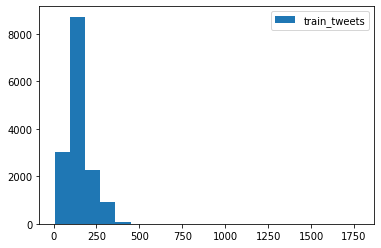

In [10]:
length_train = train['TEXT'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.legend() 
plt.show()

### 3.3)- Average Word Length
Take the sum of the length of all the words and divide it by the total length of the tweet

In [11]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['TEXT'].apply(lambda x: avg_word(x))
train[['TEXT','avg_word']].head()

,TEXT,avg_word
0,Unless you’re trying to buy me a Mercedes G-wa...,4.400000
1,Ford recently made news by suspending producti...,6.551724
2,Just to get a closer look at the interior of o...,5.476190
3,"In October 2014, General Motors got permission...",7.058824
4,I took a spin in a self-driving car today. My ...,5.093750


### 3.4)-Number of stopwords
- We shall use nltk stopword library. One may customize stopwords
- Some examples are "the, is, at, which, and, on"

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['stopwords'] = train['TEXT'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['TEXT','stopwords']].head()

,TEXT,stopwords
0,Unless you’re trying to buy me a Mercedes G-wa...,6
1,Ford recently made news by suspending producti...,8
2,Just to get a closer look at the interior of o...,8
3,"In October 2014, General Motors got permission...",3
4,I took a spin in a self-driving car today. My ...,10


### 3.5)-Number of special characters
- One easy example is number of hashtags
- Use of the ‘starts with’ function because hashtags (or mentions) always appear at the beginning of a word.

In [13]:
train['TEXT'][2]

'Just to get a closer look at the interior of our 2009 BMW 3 series convertible this is it.  As… https://www.instagram.com/p/BQoc2GUlrUU/'

In [14]:
train['hastags'] = train['TEXT'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['TEXT','hastags']].head()

,TEXT,hastags
0,Unless you’re trying to buy me a Mercedes G-wa...,0
1,Ford recently made news by suspending producti...,0
2,Just to get a closer look at the interior of o...,0
3,"In October 2014, General Motors got permission...",0
4,I took a spin in a self-driving car today. My ...,1


In [15]:
train[['TEXT','hastags']].tail()

,TEXT,hastags
14995,Elon Musk: Google won't compete with Tesla on ...,0
14996,In which I am touched by the altruism of every...,0
14997,Intergalactic dream trio on the track #BMW #Mp...,2
14998,And its good morning all from australia pic.tw...,0
14999,http://caferacerpasion.com 1979 BMW R100RS #...,4


In [16]:
train['@'] = train['TEXT'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
train[['TEXT','@']].head()

,TEXT,@
0,Unless you’re trying to buy me a Mercedes G-wa...,0
1,Ford recently made news by suspending producti...,0
2,Just to get a closer look at the interior of o...,0
3,"In October 2014, General Motors got permission...",0
4,I took a spin in a self-driving car today. My ...,0


### 3.6)-Number of numerics/digits

In [17]:
train['numerics'] = train['TEXT'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['TEXT','numerics']].head()

,TEXT,numerics
0,Unless you’re trying to buy me a Mercedes G-wa...,0
1,Ford recently made news by suspending producti...,0
2,Just to get a closer look at the interior of o...,2
3,"In October 2014, General Motors got permission...",0
4,I took a spin in a self-driving car today. My ...,0


In [18]:
# example
s = "28212"
print(s.isdigit())

True


### 3.7)-Number of Uppercase words

In [19]:
train['upper'] = train['TEXT'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['TEXT','upper']].head()

,TEXT,upper
0,Unless you’re trying to buy me a Mercedes G-wa...,0
1,Ford recently made news by suspending producti...,2
2,Just to get a closer look at the interior of o...,1
3,"In October 2014, General Motors got permission...",0
4,I took a spin in a self-driving car today. My ...,2


### 3.8)- Save file

In [20]:
train.to_pickle('basic_feature.pkl')

# 4)- Text Clean

- Lower casing
- Punctuation removal
- Stopwords removal
- Frequent words removal
- Rare words removal
- Spelling correction
- Tokenization
- Stemming
- Lemmatization

In [21]:
train=pd.read_csv(filename)
train.shape

(15000, 1)

### 4.1)-Lower case
First pre-processing step which we will do is transform our tweets into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Father’ and ‘father’ will be taken as different words.

In [22]:
train['TEXT'] = train['TEXT'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['TEXT'].head()

0    unless you’re trying to buy me a mercedes g-wa...
1    ford recently made news by suspending producti...
2    just to get a closer look at the interior of o...
3    in october 2014, general motors got permission...
4    i took a spin in a self-driving car today. my ...
Name: TEXT, dtype: object

### 4.2)-Removing Punctuation
removing em will help us reduce the size

In [23]:
train['TEXT'] = train['TEXT'].str.replace('[^\w\s]','')
train['TEXT'].head()

0    unless youre trying to buy me a mercedes gwago...
1    ford recently made news by suspending producti...
2    just to get a closer look at the interior of o...
3    in october 2014 general motors got permission ...
4    i took a spin in a selfdriving car today my sa...
Name: TEXT, dtype: object

In [24]:
train['TEXT'][1]

'ford recently made news by suspending production of f150 pickups due to a parts shortage and now general motors fiat chrysler and bmw are enduring similar headaches httpbitly2rbr2g5 pictwittercomdw3kpzgsst'

In [25]:
import string
import re

def clean_more(text):
    ''' remove text in square brackets, remove punctuation and remove words containing numbers if anyleft by now.'''
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

clean_pun_2 = lambda x: clean_more(x)

In [26]:
train['TEXT'] = train.TEXT.apply(clean_pun_2)
train['TEXT'].head()

0    unless youre trying to buy me a mercedes gwago...
1    ford recently made news by suspending producti...
2    just to get a closer look at the interior of o...
3    in october  general motors got permission from...
4    i took a spin in a selfdriving car today my sa...
Name: TEXT, dtype: object

### 4.3)-Removal of Stop Words

In [27]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['TEXT'] = train['TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['TEXT'].head()

0    unless youre trying buy mercedes gwagon dont t...
1    ford recently made news suspending production ...
2      get closer look interior bmw series convertible
3    october general motors got permission flints u...
4    took spin selfdriving car today safety driver ...
Name: TEXT, dtype: object

In [28]:
train['TEXT'][0]

'unless youre trying buy mercedes gwagon dont try boyfriend'

In [29]:
train['TEXT'][1]

'ford recently made news suspending production pickups due parts shortage general motors fiat chrysler bmw enduring similar headaches'

### 4.4)-Common word removal

In [30]:
# let’s check the 10 most frequently occurring words in our text data
freq = pd.Series(' '.join(train['TEXT']).split()).value_counts()[:10]
freq

selfdriving    2735
bmw            2349
porsche        2004
cars           1934
motors         1705
car            1651
mercedes       1589
audi           1485
new            1239
general        1152
dtype: int64

**We won't remove them as they are of high value**

### 4.5)-Rare words removal

In [31]:
freq = pd.Series(' '.join(train['TEXT']).split()).value_counts()[-10:]
freq

theshop                                                   1
huffpost                                                  1
vane                                                      1
candles                                                   1
httpswwwwiredcomstoryselfdrivingcarsinsuranceambiguity    1
rachelcduban                                              1
vrealize                                                  1
endras                                                    1
kombikeguk                                                1
attended                                                  1
dtype: int64

**Mercedezbenz is useful word. So, we shall leave them too**

### 4.6)-Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences.

In [32]:
from textblob import TextBlob

In [33]:
TextBlob(train['TEXT'][1]).words

WordList(['ford', 'recently', 'made', 'news', 'suspending', 'production', 'pickups', 'due', 'parts', 'shortage', 'general', 'motors', 'fiat', 'chrysler', 'bmw', 'enduring', 'similar', 'headaches'])

### 4.7)-Lemmatization
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [34]:
from textblob import Word
train['TEXT'] = train['TEXT'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['TEXT'].head()

0    unless youre trying buy mercedes gwagon dont t...
1    ford recently made news suspending production ...
2      get closer look interior bmw series convertible
3    october general motor got permission flint une...
4    took spin selfdriving car today safety driver ...
Name: TEXT, dtype: object

In [35]:
train.head()

,TEXT
0,unless youre trying buy mercedes gwagon dont t...
1,ford recently made news suspending production ...
2,get closer look interior bmw series convertible
3,october general motor got permission flint une...
4,took spin selfdriving car today safety driver ...


### save work

In [36]:
train.to_pickle('clean.pkl')

# 5)- Feature extraction for clean Data

In [37]:
tidy_data=pd.read_pickle('clean.pkl')
tidy_data.shape

(15000, 1)

### 5.1)-Number of words

In [38]:
tidy_data['word_count'] = tidy_data['TEXT'].apply(lambda x: len(str(x).split(" ")))
tidy_data[['TEXT','word_count']].head()

,TEXT,word_count
0,unless youre trying buy mercedes gwagon dont t...,9
1,ford recently made news suspending production ...,18
2,get closer look interior bmw series convertible,7
3,october general motor got permission flint une...,10
4,took spin selfdriving car today safety driver ...,16


### 5.2)-Number of characters

In [39]:
tidy_data['char_count'] = tidy_data['TEXT'].str.len() ## this also includes spaces
tidy_data[['TEXT','char_count']].head()

,TEXT,char_count
0,unless youre trying buy mercedes gwagon dont t...,58
1,ford recently made news suspending production ...,128
2,get closer look interior bmw series convertible,47
3,october general motor got permission flint une...,81
4,took spin selfdriving car today safety driver ...,98


### 5.3)-Number of Stopwords

In [40]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

tidy_data['stopwords'] = tidy_data['TEXT'].apply(lambda x: len([x for x in x.split() if x in stop]))
tidy_data[['TEXT','stopwords']].head()

,TEXT,stopwords
0,unless youre trying buy mercedes gwagon dont t...,0
1,ford recently made news suspending production ...,0
2,get closer look interior bmw series convertible,0
3,october general motor got permission flint une...,0
4,took spin selfdriving car today safety driver ...,0


### 5.4)-Number of special characters

In [41]:
tidy_data['hastags'] = tidy_data['TEXT'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
tidy_data[['TEXT','hastags']].head()

,TEXT,hastags
0,unless youre trying buy mercedes gwagon dont t...,0
1,ford recently made news suspending production ...,0
2,get closer look interior bmw series convertible,0
3,october general motor got permission flint une...,0
4,took spin selfdriving car today safety driver ...,0


In [42]:
tidy_data['@'] = tidy_data['TEXT'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
tidy_data[['TEXT','@']].head()

,TEXT,@
0,unless youre trying buy mercedes gwagon dont t...,0
1,ford recently made news suspending production ...,0
2,get closer look interior bmw series convertible,0
3,october general motor got permission flint une...,0
4,took spin selfdriving car today safety driver ...,0


### 5.5)-Number of numerics/digits

In [43]:
tidy_data['numerics'] = tidy_data['TEXT'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
tidy_data[['TEXT','numerics']].head()

,TEXT,numerics
0,unless youre trying buy mercedes gwagon dont t...,0
1,ford recently made news suspending production ...,0
2,get closer look interior bmw series convertible,0
3,october general motor got permission flint une...,0
4,took spin selfdriving car today safety driver ...,0


### 5.6)-Number of Uppercase words

In [44]:
tidy_data['upper'] = tidy_data['TEXT'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
tidy_data[['TEXT','upper']].head()

,TEXT,upper
0,unless youre trying buy mercedes gwagon dont t...,0
1,ford recently made news suspending production ...,0
2,get closer look interior bmw series convertible,0
3,october general motor got permission flint une...,0
4,took spin selfdriving car today safety driver ...,0


### save work

In [45]:
tidy_data.to_pickle('clean.pkl')

# 6)- Comparsion of tidy VS untidy text

In [46]:
untidy_data=pd.read_pickle('basic_feature.pkl')
untidy_data.shape

(15000, 9)

In [47]:
tidy_data=pd.read_pickle('clean.pkl')
tidy_data.shape

(15000, 8)

In [48]:
untidy_data=untidy_data.drop('avg_word', axis=1)

In [49]:
untidy_data.tail()

,TEXT,word_count,char_count,stopwords,hastags,@,numerics,upper
14995,Elon Musk: Google won't compete with Tesla on ...,16,127,5,0,0,0,0
14996,In which I am touched by the altruism of every...,17,241,5,0,0,0,1
14997,Intergalactic dream trio on the track #BMW #Mp...,14,162,2,2,6,0,1
14998,And its good morning all from australia pic.tw...,8,66,3,0,0,0,0
14999,http://caferacerpasion.com 1979 BMW R100RS #...,15,167,1,4,0,1,5


In [50]:
tidy_data.tail()

,TEXT,word_count,char_count,stopwords,hastags,@,numerics,upper
14995,elon musk google wont compete tesla selfdrivin...,9,57,0,0,0,0,0
14996,touched altruism everyday driver beta testing ...,10,98,0,0,0,0,0
14997,intergalactic dream trio track bmw mpower lien...,12,141,0,0,0,0,0
14998,good morning australia,3,22,0,0,0,0,0
14999,httpcaferacerpasioncom bmw streettracker bmw m...,10,93,0,0,0,0,0


Clearly, clean data has less noise and we have better data to train. 

Next stage is to implement model.

# END OF NOTEBOOK